In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df = pd.read_csv("C:\\Users\91702\Downloads\customer_churn_dataset_1000.csv")
df

,age,gender,subscription_type,contract_type,tenure_months,avg_monthly_spend,customer_support_calls,has_internet_service,payment_method,churn
0,70,female,standard,monthly,59,1128,4,yes,paypal,1
1,44,female,basic,monthly,44,1544,5,yes,debit card,1
2,78,female,premium,monthly,19,862,2,yes,credit card,0
3,49,male,premium,yearly,22,1819,2,yes,paypal,0
4,59,male,basic,quarterly,32,1830,3,yes,bank transfer,0
...,...,...,...,...,...,...,...,...,...,...
995,55,male,standard,quarterly,64,1239,1,yes,paypal,0
996,23,female,standard,quarterly,51,1236,1,yes,debit card,1
997,57,male,standard,quarterly,4,1277,1,yes,debit card,1
998,40,female,basic,monthly,29,1791,2,no,bank transfer,1


In [3]:
label_encoders = {}
for column in df.columns[:-1]:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df

,age,gender,subscription_type,contract_type,tenure_months,avg_monthly_spend,customer_support_calls,has_internet_service,payment_method,churn
0,52,0,2,0,58,421,4,1,3,1
1,26,0,0,0,43,598,5,1,2,1
2,60,0,1,0,18,297,2,1,1,0
3,31,1,1,2,21,708,2,1,3,0
4,41,1,0,1,31,713,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,37,1,2,1,63,469,1,1,3,0
996,5,0,2,1,50,467,1,1,2,1
997,39,1,2,1,3,484,1,1,2,1
998,22,0,0,0,28,695,2,0,0,1


In [5]:
x = df.drop("churn",axis = 1)
y = df["churn"]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [7]:
model = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=40)
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
x_pred = model.predict(x_test)
x_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [9]:
accuracy = accuracy_score(x_pred,y_test)
print(f"Accuracy Score :{accuracy * 100:.2f}%")

Accuracy Score :87.50%


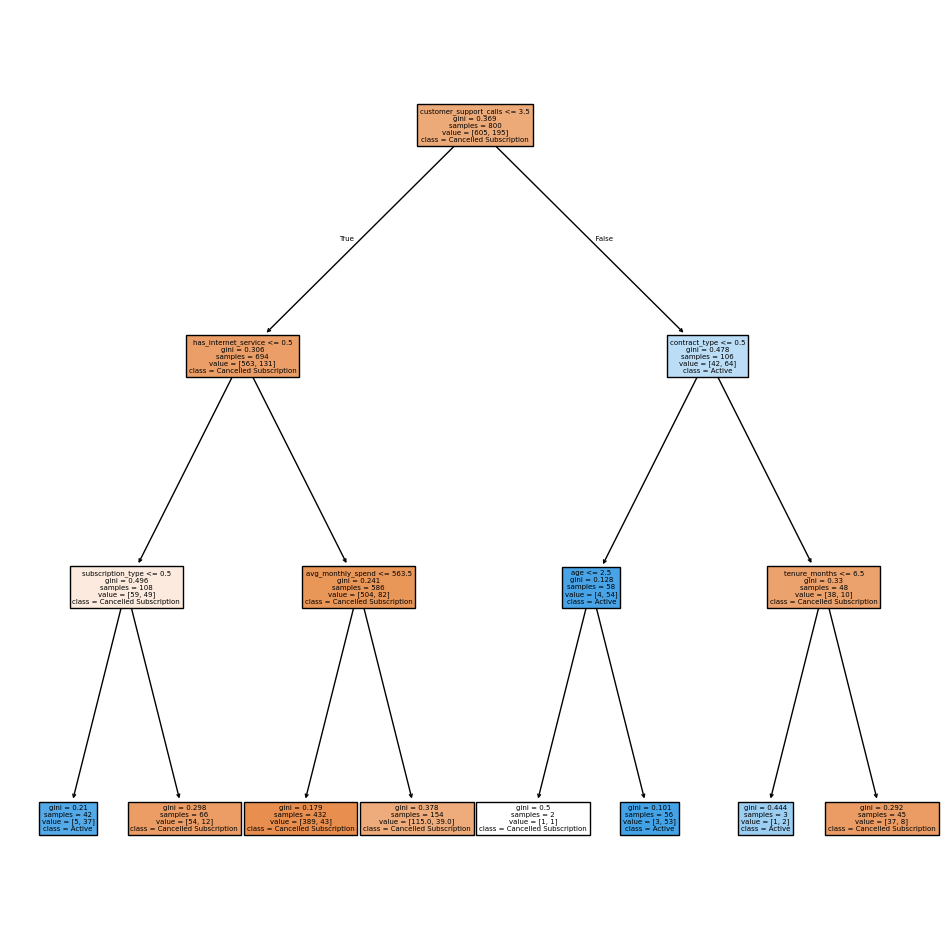

In [11]:
plt.figure(figsize=(12,12))
plot_tree(model,feature_names=["age","gender","subscription_type","contract_type","tenure_months","avg_monthly_spend","customer_support_calls","has_internet_service","payment_method"],class_names=["Cancelled Subscription","Active"],filled=True)
plt.show()

In [15]:
def new_data(age,gender,subscription_type,contract_type,tenure_months,avg_monthly_spend,customer_support_calls,has_internet_service,payment_method, model, encoders):
    features = np.array([[
        encoders["age"].transform([age])[0],
        encoders["gender"].transform([gender])[0],
        encoders["subscription_type"].transform([subscription_type])[0],
        encoders["contract_type"].transform([contract_type])[0],
        encoders["tenure_months"].transform([tenure_months])[0],
        encoders["avg_monthly_spend"].transform([avg_monthly_spend])[0],
        encoders["customer_support_calls"].transform([customer_support_calls])[0],
        encoders["has_internet_service"].transform([has_internet_service])[0],
        encoders["payment_method"].transform([payment_method])[0],
    ]])
    prediction = model.predict(features)
    return prediction[0]  

result = new_data(70,"female","standard","monthly",59,1128,4,"yes","paypal", model, label_encoders)
print("Active" if result == 1 else "No Subscription")

Active


c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
